## importing the libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## importing the datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")   

## taking a look at training data
    getting a list of features 
    see a sample of dataset for getting idea of variables
    see a summary of training dataset
    check for any unusable value

In [3]:
print(train.describe(include="all"))
print(train.columns)
print(train.sample(5))
print(train.describe(include = "all"))
print(pd.isnull(train).sum())

        PassengerId    Survived      Pclass             Name   Sex  \
count    891.000000  891.000000  891.000000              891   891   
unique          NaN         NaN         NaN              891     2   
top             NaN         NaN         NaN  Corn, Mr. Harry  male   
freq            NaN         NaN         NaN                1   577   
mean     446.000000    0.383838    2.308642              NaN   NaN   
std      257.353842    0.486592    0.836071              NaN   NaN   
min        1.000000    0.000000    1.000000              NaN   NaN   
25%      223.500000    0.000000    2.000000              NaN   NaN   
50%      446.000000    0.000000    3.000000              NaN   NaN   
75%      668.500000    1.000000    3.000000              NaN   NaN   
max      891.000000    1.000000    3.000000              NaN   NaN   

               Age       SibSp       Parch Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000    891  891.000000      204   
unique     

## print percentages of females vs. males that survive

In [4]:
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


## print percentage of people by Pclass that survived

In [5]:
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


## print percentage of people by SibSp that survived

In [6]:
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


## sort the ages into logical categories as well as cabin into CabinBool
    CabinBool = 0 if no cabin info is available and 1 if cabin info is available

In [7]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

## calculate percentage of CabinBool vs survived

In [8]:
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


## have a look at the test data

In [9]:
print(test.describe(include="all"))

        PassengerId      Pclass                         Name   Sex  \
count    418.000000  418.000000                          418   418   
unique          NaN         NaN                          418     2   
top             NaN         NaN  Chaudanson, Miss. Victorine  male   
freq            NaN         NaN                            1   266   
mean    1100.500000    2.265550                          NaN   NaN   
std      120.810458    0.841838                          NaN   NaN   
min      892.000000    1.000000                          NaN   NaN   
25%      996.250000    1.000000                          NaN   NaN   
50%     1100.500000    3.000000                          NaN   NaN   
75%     1204.750000    3.000000                          NaN   NaN   
max     1309.000000    3.000000                          NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   418.000000  418.000000  418.000000       418  417.000000   
unique         NaN     

## dropping the cabin and tickets feature(column)

In [10]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

## now we need to fill in the missing values in the Embarked feature

In [11]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)
print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)
print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)


Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


## replacing the missing values in the Embarked feature with S

In [12]:
train = train.fillna({"Embarked": "S"})


## create a combined group of both datasets

In [13]:
combine = [train, test]
print(combine)

[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...

## extract a title for each Name in the train and test datasets

In [14]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


## replace various titles with more common names for clarity

In [15]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


## map each of the title groups to a numerical value

In [16]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

## fill missing age with mode age group for each title

In [17]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

In [18]:
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

## map each Age value to a numerical value

In [19]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

## dropping the Age feature for now, might change

In [20]:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

## drop the name feature since it contains no more useful information.

In [21]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

## map each Sex value to a numerical value

In [22]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

## map each Embarked value to a numerical value

In [23]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

## fill in missing Fare value in test set based on mean fare for that Pclass

In [24]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

## map Fare values into groups of numerical values

In [25]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

## drop Fare values

In [26]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  \
0            1         0       3    0      1      0         1       4.0   
1            2         1       1    1      1      0         2       6.0   
2            3         1       3    1      0      0         1       5.0   
3            4         1       1    1      1      0         1       5.0   
4            5         0       3    0      0      0         1       5.0   

   CabinBool  Title FareBand  
0          0      1        1  
1          1      3        4  
2          0      2        2  
3          1      3        4  
4          0      1        2  
   PassengerId  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  CabinBool  \
0          892       3    0      0      0         3       5.0          0   
1          893       3    1      1      0         1       6.0          0   
2          894       2    0      0      0         3       7.0          0   
3          895       3    0      0      0         1       5

In [27]:
from sklearn.model_selection import train_test_split
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)


## Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred1 = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred1, y_val) * 100, 2)
print(acc_gaussian)

78.68


## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred2 = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred2, y_val) * 100, 2)
print(acc_logreg)

79.7


## Support Vector Machines

In [30]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred3 = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred3, y_val) * 100, 2)
print(acc_svc)

82.74


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred4 = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred4, y_val) * 100, 2)
print(acc_decisiontree)

79.7


## KNN or k-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred5 = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred5, y_val) * 100, 2)
print(acc_knn)

77.66


In [33]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
               'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg,
              acc_gaussian, acc_decisiontree]})
print(models.sort_values(by='Score', ascending=False))

                     Model  Score
0  Support Vector Machines  82.74
2      Logistic Regression  79.70
4            Decision Tree  79.70
3              Naive Bayes  78.68
1                      KNN  77.66


## Since SVC has the greatest score so we'll plot out graphs according to it we'll also create a submission.csv file for the final submission data

### set ids as PassengerId and predict survival

In [34]:
ids = test['PassengerId']
predictions = svc.predict(test.drop('PassengerId', axis=1))

### set the output as a dataframe and convert to csv file named submission.csv

In [35]:
df = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
df.to_csv('submission.csv', index=False)

### graphs of training data

             PassengerId  Survived    Pclass       Sex     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.131900  0.083081  0.018443   
Sex            -0.042939  0.543351 -0.131900  1.000000  0.114631  0.245489   
SibSp          -0.057527 -0.035322  0.083081  0.114631  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443  0.245489  0.414838  1.000000   
Embarked       -0.030467  0.106811  0.045702  0.116569 -0.059961 -0.078665   
AgeGroup        0.040937 -0.106868 -0.283994 -0.116055 -0.326398 -0.259925   
CabinBool       0.019919  0.316912 -0.725541  0.140391 -0.040460  0.036987   
Title           0.010871  0.373139 -0.184514  0.453902  0.245915  0.284756   

             Embarked  AgeGroup  CabinBool     Title  
PassengerId -0.030467  0.040937   0.019919  0.010871  
Survived     0.106811 -0.106868

[Text(0, 0, 'PassengerId'), Text(0, 0, 'Survived')]

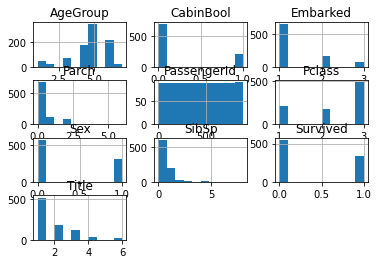

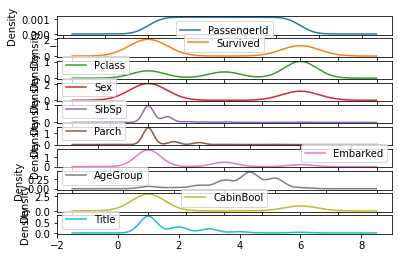

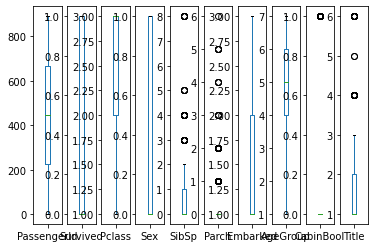

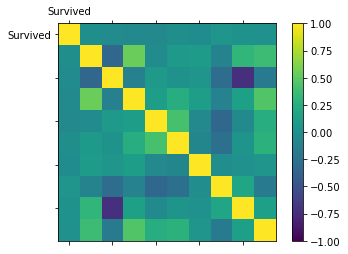

In [36]:
train.hist()
train.plot(kind='density',subplots=True,sharex=False)
train.plot(kind='box',subplots=True,sharex=False)
corr=train.corr()
print(corr)
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(corr,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(9)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

## graphs of submission data

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
             PassengerId  Survived
PassengerId     1.000000 -0.015154
Survived       -0.015154  1.000000


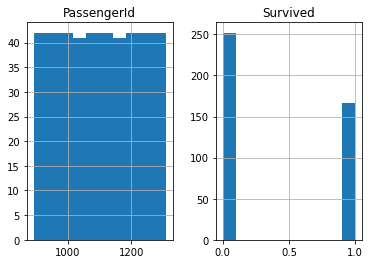

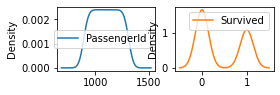

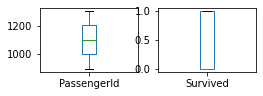

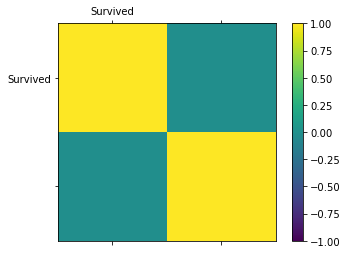

In [37]:
print(df)
df.hist()
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
df.plot(kind='box',subplots=True,layout=(3,3),sharex=False)
corr_mat=df.corr()
print(corr_mat)
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(corr_mat,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(9)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()